# Feature Selection for Example Cities

In [14]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
def combine_city_data(city_code, dfs, names):
    """
    Generate a single DataFrame with data from all years for one city.
    """
    data_rows = [df.loc[city_code] for df in dfs]
    all_data = pd.concat(data_rows, axis=1)
    all_data.columns = names
    all_data.index.name = 'Year'
    return all_data
    

def import_training_data(filename):
    return pd.read_csv('../data/train/%s' % filename, index_col='UACE Code', dtype={'UACE Code': str})

city_info = pd.read_csv('../data/Cities.csv', index_col='UACE Code', dtype={'UACE Code': str})

def get_city_code(name):
    return city_info[city_info['Primary UZA Name'] == name].index[0]

def get_city_name(code):
    return city_info.loc[code]['Primary UZA Name'].iloc[0]

def plot_correlations(city, features):
    xdfs = [import_training_data('%s.csv' % name) for name in features]
    city_xvals = combine_city_data(city, xdfs, features)
    correlation_matrix = city_xvals.corr()
    plt.figure(figsize=(10, 8))  # Adjust size as necessary
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1.0)
    plt.title("Correlation Matrix (%s)" % get_city_name(city))
    plt.show()

In [27]:
city = get_city_code('Columbus, OH')
print(city)

ynames = ['UPT_percap']#, 'PMT_percap', 'FARES_infladj_percap']
ydfs = [import_training_data('%s.csv' % name) for name in ynames]
city_yvals = combine_city_data(city, ydfs, ynames)

19234


In [28]:
all_features = [
    'VRM_percap', 
    'VRH_percap', 
    'VOMS_percap', 
    'OpExp_GA_frac', 
    'OpExp_VM_frac', 
    'OpExp_VO_frac',
    'OpExp_Total_infladj_percap', 
    'OpFund_infladj_percap', 
    'CapFund_infladj_percap', 
    'OpFund_frac', 
    'TotalFund_infladj_percap', 
    'FedFund_frac', 
    'StateFund_frac', 
    'LocalFund_frac', 
]
xdfs = [import_training_data('%s.csv' % name) for name in all_features]
city_xvals = combine_city_data(city, xdfs, all_features)
city_xvals

,VRM_percap,VRH_percap,VOMS_percap,OpExp_GA_frac,OpExp_VM_frac,OpExp_VO_frac,OpExp_Total_infladj_percap,OpFund_infladj_percap,CapFund_infladj_percap,OpFund_frac,TotalFund_infladj_percap,FedFund_frac,StateFund_frac,LocalFund_frac
Year,,,,,,,,,,,,,,
1991,9.210416,0.702174,0.000306,0.182897,0.182511,0.566497,78.021798,94.231186,22.588234,0.806640,116.819420,0.230284,0.085961,0.446907
1992,9.054159,0.699604,0.000315,0.197521,0.180222,0.550496,78.756729,85.925444,6.167326,0.933031,92.092770,0.139923,0.078651,0.502238
1993,8.575510,0.672207,0.000279,0.218185,0.173303,0.539229,75.502519,81.966562,31.172863,0.724474,113.139425,0.288940,0.082453,0.431580
1994,8.738745,0.671438,0.000288,0.219308,0.165901,0.542392,75.158775,86.405197,5.128058,0.943976,91.533255,0.148276,0.074298,0.540709
1995,8.662434,0.669368,0.000276,0.218133,0.165503,0.539051,75.353099,83.764518,35.914833,0.699908,119.679351,0.292206,0.056052,0.471754
1996,8.729915,0.668790,0.000275,0.169527,0.171426,0.587497,73.988370,75.209292,5.222661,0.935067,80.431953,0.092426,0.069070,0.558125
1997,8.671336,0.668280,0.000267,0.220038,0.160926,0.547547,74.613359,75.385809,4.507352,0.943583,79.893160,0.109372,0.065778,0.545386
1998,8.873105,0.675636,0.000267,0.177474,0.174900,0.569636,74.789538,75.424068,5.991428,0.926409,81.415496,0.093410,0.065184,0.524675
1999,9.204693,0.717808,0.000274,0.210669,0.162419,0.549234,81.176433,81.553612,20.714806,0.797447,102.268418,0.259504,0.057178,0.468500


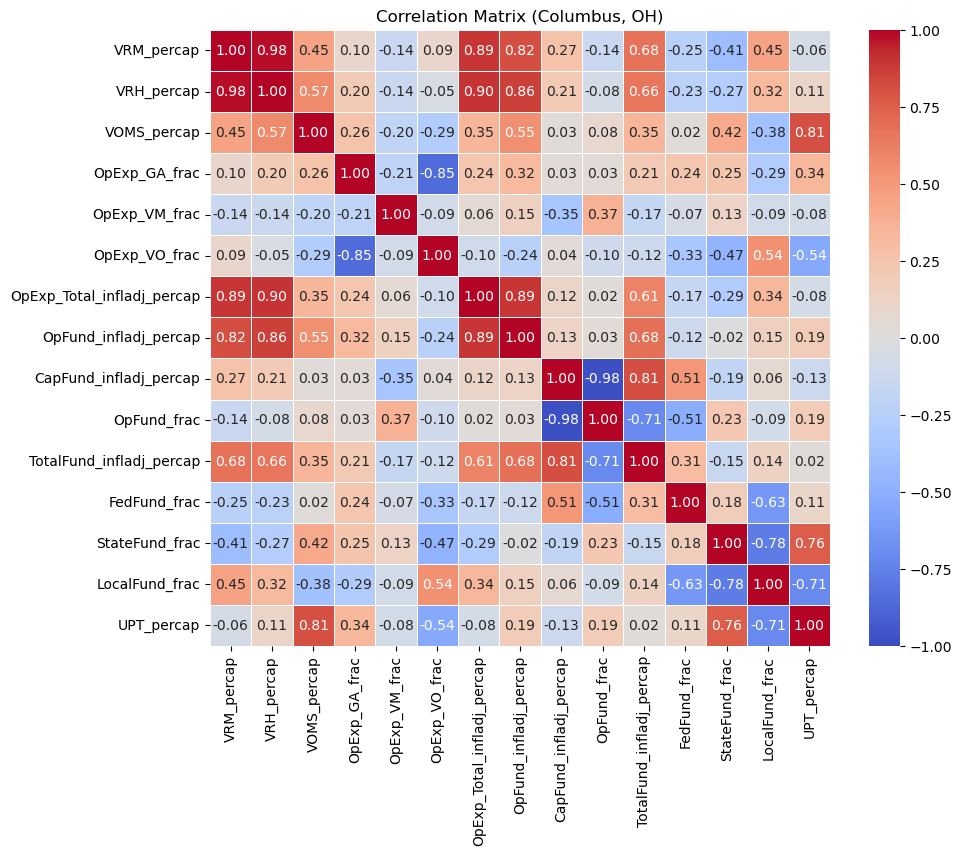

In [29]:
plot_correlations(city, all_features + ['UPT_percap'])

In [30]:
lasso_pipe = Pipeline([
    ('scale', StandardScaler()),  
    ('lasso', LassoCV(alphas=None, cv=5, max_iter=100000))  
])

y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[-0.80932288  0.          1.44351106 -0.30125539 -0.19620389 -0.6887479
 -0.01252318  0.41132193 -0.07037495 -0.68310194 -0.         -1.48167861
 -0.30502438 -1.80015961]


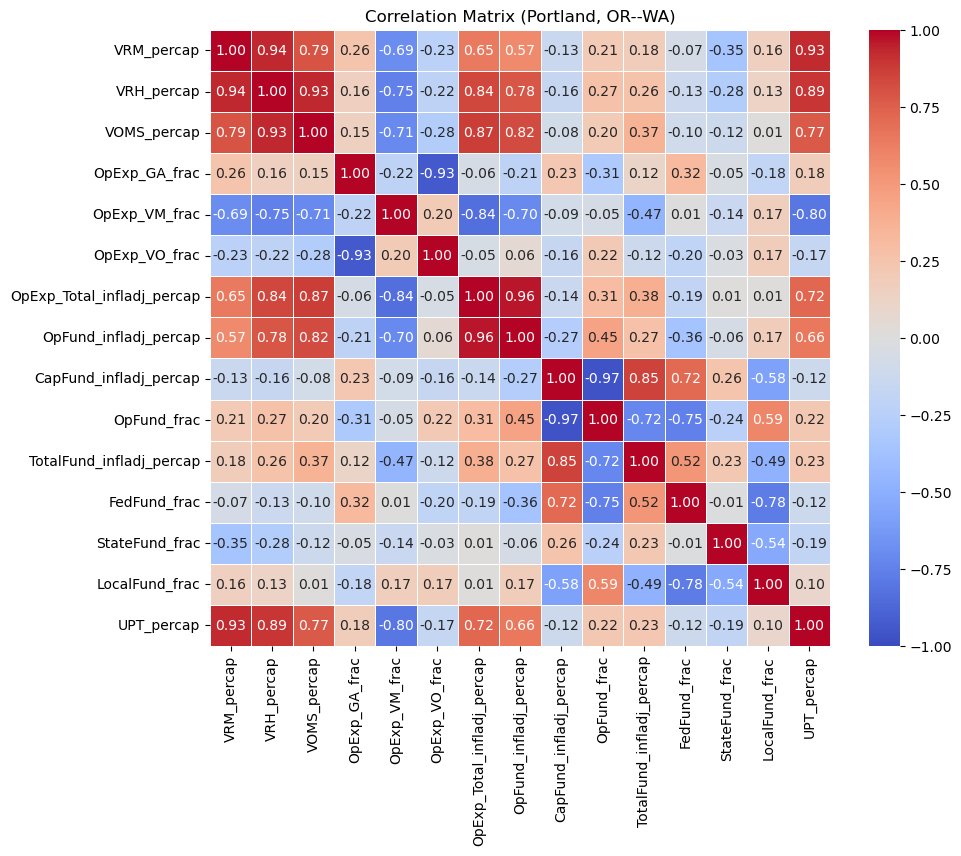

In [35]:
city = get_city_code('Portland, OR--WA')
xdfs = [import_training_data('%s.csv' % name) for name in all_features]
city_xvals = combine_city_data(city, xdfs, all_features)
plot_correlations(city, all_features + ['UPT_percap'])

In [38]:
y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[-0.36847691  0.         -0.07313637 -1.0253211   0.56299081 -1.46095901
 -0.20988299 -1.37014033  0.24483422 -0.2677838   0.         -0.55131629
 -0.17272582  0.        ]


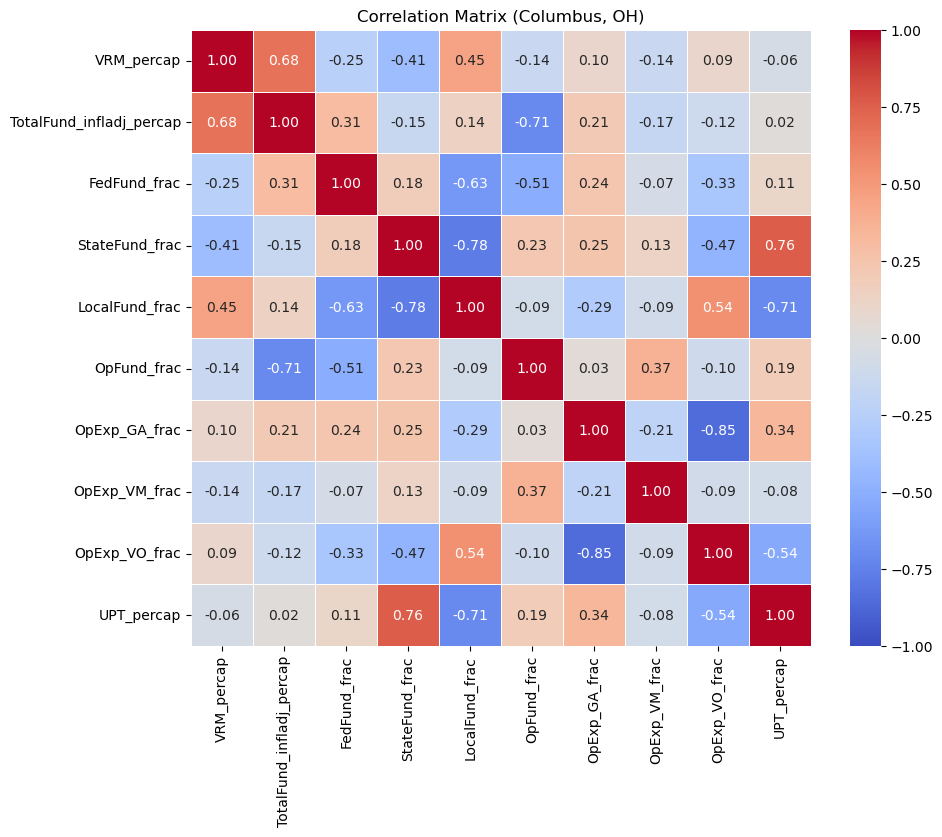

In [31]:
select_features = [
    'VRM_percap',
    'TotalFund_infladj_percap', 
    'FedFund_frac', 
    'StateFund_frac', 
    'LocalFund_frac', 
    'OpFund_frac', 
    'OpExp_GA_frac', 
    'OpExp_VM_frac', 
    'OpExp_VO_frac'
]
xdfs = [import_training_data('%s.csv' % name) for name in select_features]
city_xvals = combine_city_data(city, xdfs, select_features)
plot_correlations(city, select_features + ['UPT_percap'])

In [34]:
y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[ 0.          0.         -0.          0.95389733 -0.32498161  0.
  0.         -0.         -0.0610669 ]


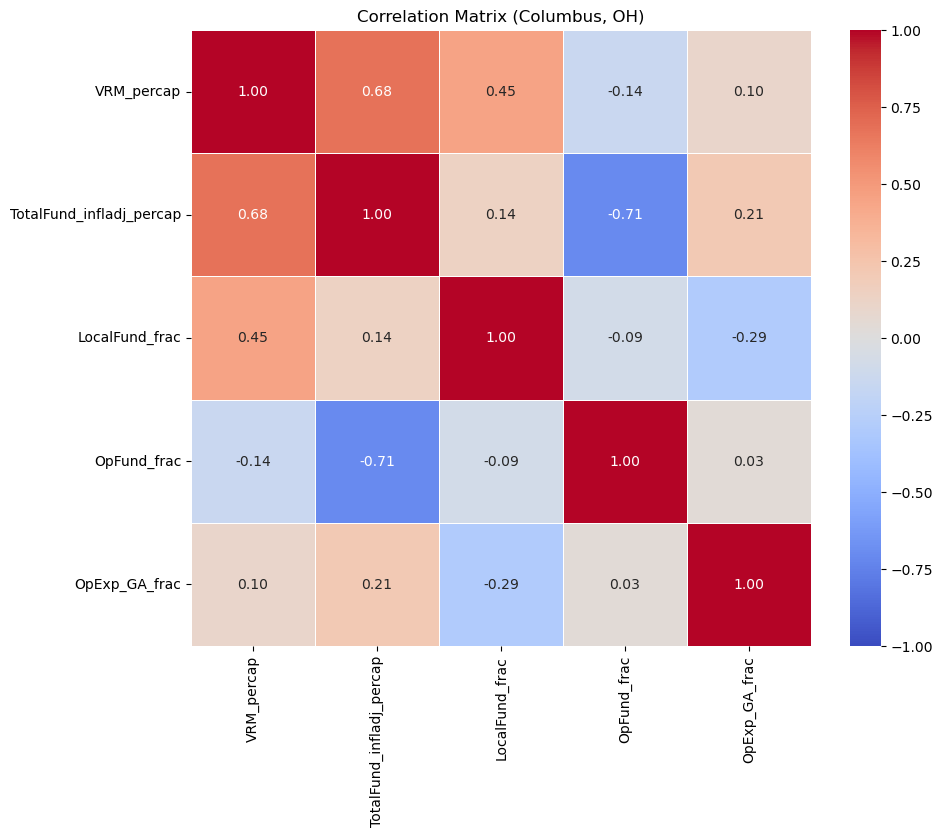

In [22]:
select_features = [
    'VRM_percap',
    'TotalFund_infladj_percap',
    'LocalFund_frac', 
    'OpFund_frac', 
    'OpExp_GA_frac',
]
xdfs = [import_training_data('%s.csv' % name) for name in select_features]
city_xvals = combine_city_data(city, xdfs, select_features)
plot_correlations(city, select_features)

In [23]:
y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[ 0.30218919  0.         -1.54784315  0.1078379   0.07369198]


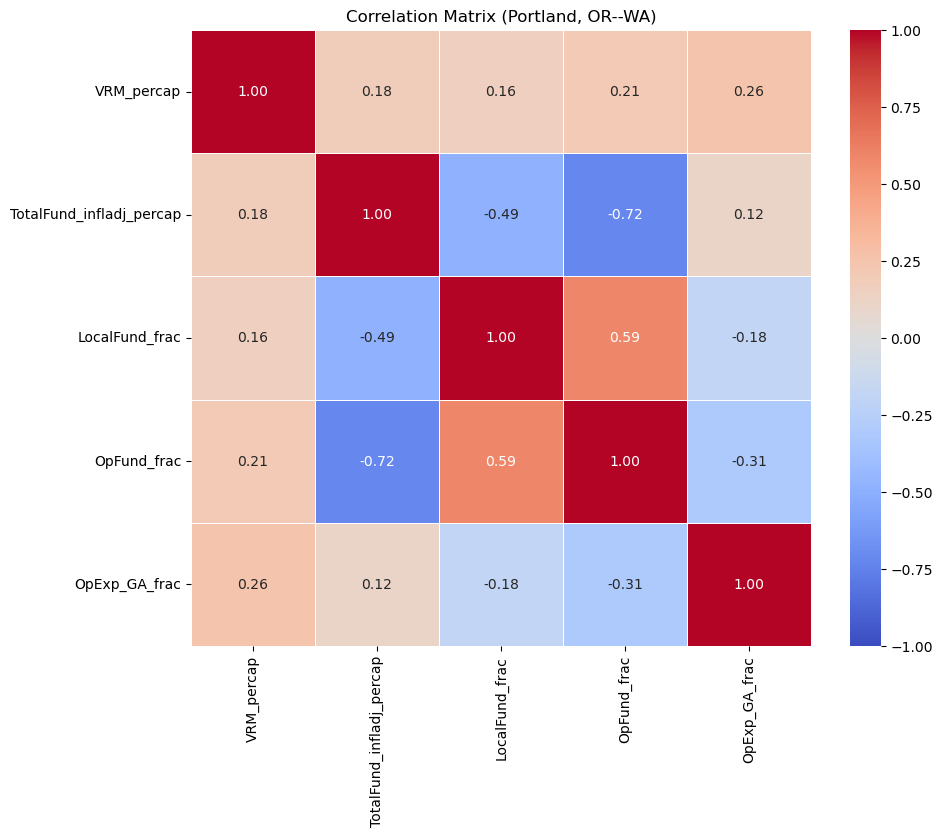

In [24]:
city = get_city_code('Portland, OR--WA')
xdfs = [import_training_data('%s.csv' % name) for name in select_features]
city_xvals = combine_city_data(city, xdfs, select_features)
ydfs = [import_training_data('%s.csv' % name) for name in ynames]
city_yvals = combine_city_data(city, ydfs, ynames)
plot_correlations(city, select_features)

In [25]:
y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[ 4.6683661   1.31517635 -0.40619509  1.46012387  0.        ]


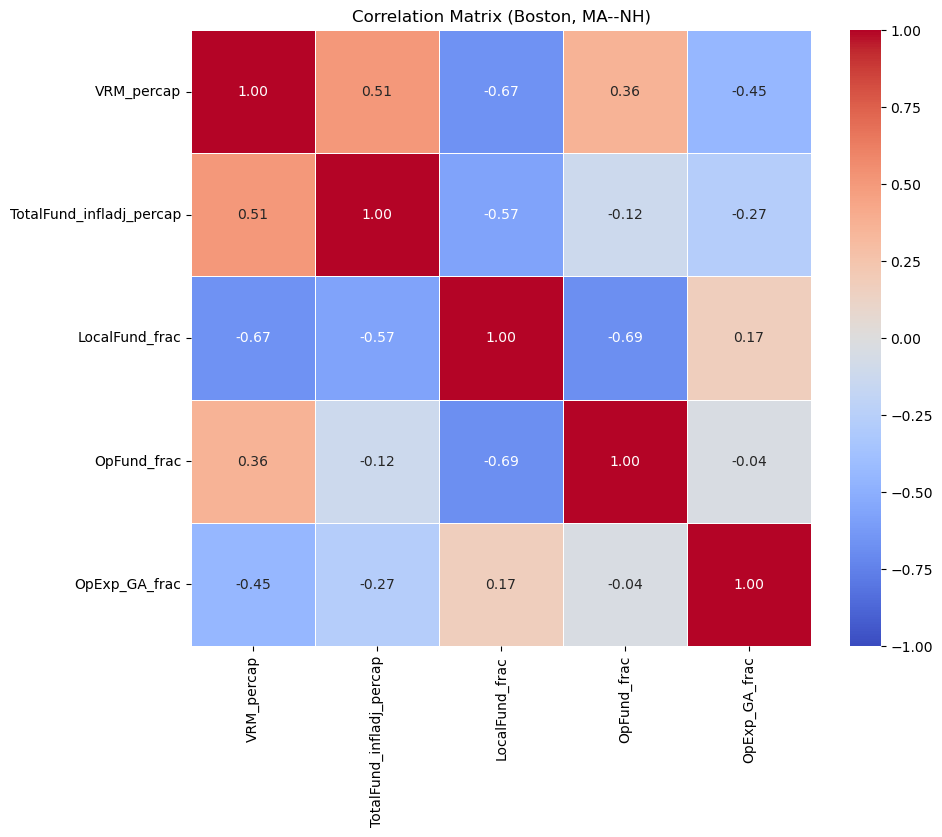

In [26]:
city = get_city_code('Boston, MA--NH')
plot_correlations(city, select_features)